<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Часть-1:-Много-гипотез" data-toc-modified-id="Часть-1:-Много-гипотез-1">Часть 1: Много гипотез</a></span><ul class="toc-item"><li><span><a href="#Мудрость" data-toc-modified-id="Мудрость-1.1">Мудрость</a></span></li><li><span><a href="#Алексей" data-toc-modified-id="Алексей-1.2">Алексей</a></span></li><li><span><a href="#Рейтинги-президентов" data-toc-modified-id="Рейтинги-президентов-1.3">Рейтинги президентов</a></span></li><li><span><a href="#Сон" data-toc-modified-id="Сон-1.4">Сон</a></span></li><li><span><a href="#Say-my-name" data-toc-modified-id="Say-my-name-1.5">Say my name</a></span></li><li><span><a href="#Матан" data-toc-modified-id="Матан-1.6">Матан</a></span></li><li><span><a href="#Бутерброд" data-toc-modified-id="Бутерброд-1.7">Бутерброд</a></span></li></ul></li><li><span><a href="#Часть-2:-Продолжаем-проверять-гипотезы" data-toc-modified-id="Часть-2:-Продолжаем-проверять-гипотезы-2">Часть 2: Продолжаем проверять гипотезы</a></span><ul class="toc-item"><li><span><a href="#Однородная-игра" data-toc-modified-id="Однородная-игра-2.1">Однородная игра</a></span></li><li><span><a href="#Мыши-и-зеркало" data-toc-modified-id="Мыши-и-зеркало-2.2">Мыши и зеркало</a></span></li><li><span><a href="#Энергетик" data-toc-modified-id="Энергетик-2.3">Энергетик</a></span></li><li><span><a href="#Бомбардировки" data-toc-modified-id="Бомбардировки-2.4">Бомбардировки</a></span></li></ul></li><li><span><a href="#Еще-больше-гипотез" data-toc-modified-id="Еще-больше-гипотез-3">Еще больше гипотез</a></span><ul class="toc-item"><li><span><a href="#Сиэтл" data-toc-modified-id="Сиэтл-3.3">Сиэтл</a></span></li><li><span><a href="#Расход-топлива" data-toc-modified-id="Расход-топлива-3.4">Расход топлива</a></span><ul class="toc-item"><li><span><a href="#vs,-mpg" data-toc-modified-id="vs,-mpg-3.4.1">vs, mpg</a></span></li><li><span><a href="#am,-mpg" data-toc-modified-id="am,-mpg-3.4.2">am, mpg</a></span></li><li><span><a href="#vs,-am" data-toc-modified-id="vs,-am-3.4.3">vs, am</a></span></li></ul></li></ul></li></ul></div>

# Часть 1: Много гипотез

В этом домашнем задании нужно проверить много-много гипотез

Каждая дает по 5 баллов

**Часть 1**

| Задание              | Баллы |
|----------------------|-------|
| Мудрость             |     5 |
| Алексей              |     5 |
| Рейтинги президентов |     5 |
| Сон                  |     5 |
| Say my name          |     5 |
| Матан                |     5 |
| Бутерброд            |     5 |
| Всего            |     35 |


**Часть 2**

| Задание            | Датасет         | Баллы |
|--------------------|-----------------|-------|
| Однородная игра    | killer_time     |     7 |
| Мыши и зеркало     | mouses_mirror   |     7 |
| Энергетик          | energy drink    |     7 |
| Бомбардировки      | london          |     7 |
| Сиэтл              | seattle         |     7 |
| Расход топлива - 1 | mtcars: vs mpg  |     5 |
| Расход топлива - 2 | mtcars: am mpg  |     5 |
| Расход топлива - 3 | mtcars: am vs   |     5 |
|                    | Всего           |    50 |


In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Мудрость

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её можно лайкнуть. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она будет лайкнута, повышается. Например, цитату

> Можно простить человеку все, кроме отсутствия. (Экзюпери)

мне не очень хотелось бы лайкать. А вот цитата

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков)

совершенно другое дело.

В табличке `df_vk_wise` лежат данные о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено, и будем работать с остатками.

In [2]:
df = pd.read_csv('C:/main/hse/statistics/hw_4/df_vk_wise.csv')[50:]
df.head(5)

,likes,reposts,text,I
50,549,25,"Я, говорит, люблю человечество, но дивлюсь на ...",True
51,607,22,"Нельзя любить то, что я люблю, да ещё так, как...",True
52,914,37,Если испытываешь по-настоящему глубокое чувств...,False
53,989,34,"— Я тебя люблю, — сказал я. \n— Это пройдет, —...",True
54,1229,32,"Он очаровательно рассказывает мне о том, как о...",False


In [3]:
df.shape

(9075, 4)

Постройте гистограмму для числа лайков постов, содержащих личные местоимения и не содержащих.

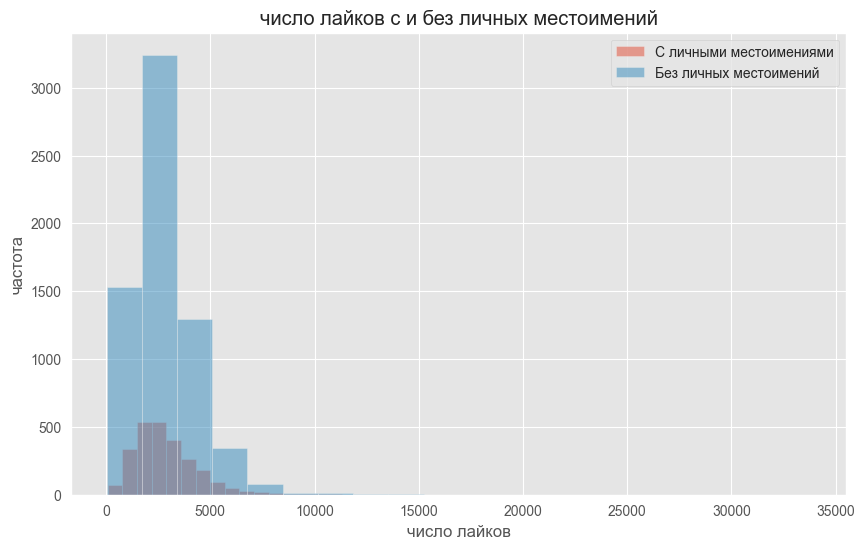

In [4]:
# фильтрация данных по наличию/отсутствию личных местоимений
df_with_personal_pronoun = df[df['I'] == True]
df_without_personal_pronoun = df[df['I'] == False]

# гистограмма
plt.figure(figsize=(10, 6))

plt.hist(df_with_personal_pronoun['likes'], bins=20, alpha=0.5, label='С личными местоимениями')
plt.hist(df_without_personal_pronoun['likes'], bins=20, alpha=0.5, label='Без личных местоимений')

plt.title('число лайков с и без личных местоимений')
plt.xlabel('число лайков')
plt.ylabel('частота')
plt.legend()

plt.show()

Хвосты на гистограммах оказываются очень длинными. Найдите медианы и средние для числа лайков. Сравните их между собой.

In [5]:
# нахождение медиан и средних
median_with_personal_pronoun = df_with_personal_pronoun['likes'].median()
median_without_personal_pronoun = df_without_personal_pronoun['likes'].median()

mean_with_personal_pronoun = df_with_personal_pronoun['likes'].mean()
mean_without_personal_pronoun = df_without_personal_pronoun['likes'].mean()

print("Медиана числа лайков с лич. мест-ми:", median_with_personal_pronoun)
print("Медиана числа лайков без лич. мест-ий:", median_without_personal_pronoun)
print("Среднее число лайков с лич. мест-ми:", mean_with_personal_pronoun)
print("Среднее число лайков без лич. мест-ий:", mean_without_personal_pronoun)

Медиана числа лайков с лич. мест-ми: 2588.5
Медиана числа лайков без лич. мест-ий: 2497.0
Среднее число лайков с лич. мест-ми: 2879.1828885400314
Среднее число лайков без лич. мест-ий: 2784.0432051478474


Проверьте гипотезу о равенстве среднего числа лайков. Используйте для этого $z$-тест, основанный на ЦПТ. Дисперсию расчитывайте по выборке, используя несмещённую оценку `(ddof=1)`. Запишите наблюдаемое значение статистики в переменную `z_obs`.

In [6]:
# несмещённые оценки дисперсий
var_with_personal_pronoun = np.var(df_with_personal_pronoun['likes'], ddof=1)
var_without_personal_pronoun = np.var(df_without_personal_pronoun['likes'], ddof=1)

n_with_personal_pronoun = len(df_with_personal_pronoun)   # размеры выборок
n_without_personal_pronoun = len(df_without_personal_pronoun)

mean_with_personal_pronoun = df_with_personal_pronoun['likes'].mean()
mean_without_personal_pronoun = df_without_personal_pronoun['likes'].mean()

# стандартная ошибку разности средних
se = np.sqrt((var_with_personal_pronoun / n_with_personal_pronoun) + (var_without_personal_pronoun / n_without_personal_pronoun))
# наблюдаемое значение статистики
z_obs = (mean_with_personal_pronoun - mean_without_personal_pronoun) / se
#  z-тест
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_obs)))

print("Наблюдаемое значение статистики z:", z_obs)
print("p-значение:", p_value)
# проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения различаются")
else:
    print("Не отвергаем нулевую гипотезу: нет оснований считать средние значения различными")

Наблюдаемое значение статистики z: 2.6644610922505323
p-значение: 0.007711178605442903
Отвергаем нулевую гипотезу: средние значения различаются


Найдите критическое значение статистики. Сравните его с наблюдаемым. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Критическое значение статистики запишите в переменную `z_crit`, а p-значение в переменную `pval`.

In [7]:
alpha = 0.05
# критическое значение статистики
z_crit = stats.norm.ppf(1 - alpha / 2)
# p-value для двусторонней альтернативы
pval = 2 * (1 - stats.norm.cdf(np.abs(z_obs)))

print("Критическое значение статистики:", z_crit)
print("p-значение для двусторонней альтернативы:", pval)
# cравнение с наблюдаемым значением
if np.abs(z_obs) > z_crit or pval < alpha:
    print("Отвергаем нулевую гипотезу: средние значения различаются")
else:
    print("Не отвергаем нулевую гипотезу: нет оснований считать средние значения различными")

Критическое значение статистики: 1.959963984540054
p-значение для двусторонней альтернативы: 0.007711178605442903
Отвергаем нулевую гипотезу: средние значения различаются


### вывод
Если наблюдаемое значение z_obs превышает по модулю z_crit, или если pval меньше alpha, то мы отвергаем нулевую гипотезу о равенстве средних значений

In [8]:
# проверка того, что задание решено верно
assert np.abs(z_obs - 2.6644610922505323) < 1e-5

Можно заметить, что у распределения числа репостов длинные хвосты. В данных есть выбросы, которые завышают среднее значение. Если выбросы сильные, то ЦПТ может ломаться. Из-за этого имеет смысл в данном случае проверять гипотезу о равенстве медиан, которые устойчивы к выбросам.

-------------------

## Алексей

__Люди всё время меня спрашивают, знаю ли я Алексея?__ Да, знаю. Он делает лучшее мыло в стране.

__а)__ Алексей считает партию изделий хорошей, если дисперсия размера не превышает $25$ грамм$^2$. Пока Алексей летел в самолёте, он измерил $10$ кусков мыла. Выборочная дисперсия оказалась равна $27$ грамм$^2$. Можно ли продавать эту партию или её надо списать в брак?

В предположении гауссовской выборки (или ЦПТ), выборочная дисперсия имеет распределение хи-квадрат с $n-1$ степенью свободы, так как это сумма квадратов (примерно) гауссовских независимых величин.

При проверке этой гипотезы найдите $p$-значение и запишите его в переменную `pval1`. Наблюдаемое значение статистики запишите в переменную `chi_obs`. Используйте уровень значимости $1\%$.

In [9]:
from scipy.stats import chi2

sample_var = 27  # выборочная дисперсия
target_var = 25  # целевая дисперсия
sample_size = 10  # размер выборки
# степени свободы для распределения хи-квадрат
degrees_of_freedom = sample_size - 1
# статистика теста (хи-квадрат)
chi_stat = (degrees_of_freedom * sample_var) / target_var
# наблюдаемое значение статистики
chi_obs = chi_stat
# p-value для односторонней альтернативы (выше)
pval1 = 1 - chi2.cdf(chi_stat, degrees_of_freedom)

print("Наблюдаемое значение статистики:", chi_obs)
print("P-value для односторонней альтернативы:", pval1)

Наблюдаемое значение статистики: 9.72
P-value для односторонней альтернативы: 0.37362476510008014


__б)__ Для того, чтобы уменьшить количество бракованного мыла, Алексей собирается внедрить новую технологию производства. Алексей произвёл по старой технологии $100$ кусков мыла. Стандартное отклонение этой партии составило $6$ грамм. Для  новой технологии стандартное отклонение, посчитанное по $100$ кускам мыла, составило $5$ грамм. Правда ли, что новая технология обладает меньшей дисперсией и её нужно внедрить на производстве?

При проверке этой гипотезы найдите $p$-значение и запишите его в переменную `pval2`. Используйте уровень значимости $1\%$.

In [10]:
from scipy.stats import f
# заданные значения
old_tech_std = 6  # стандартное отклонение для старой технологии
new_tech_std = 5  # стандартное отклонение для новой технологии
sample_size = 100  # размер выборок
# рассчитываем статистику теста (F)
F_obs = (old_tech_std**2) / (new_tech_std**2)
# степени свободы для F-распределения
df1 = sample_size - 1
df2 = sample_size - 1
#для односторонней альтернативы (левее)
pval2 = f.cdf(F_obs, df1, df2)

print("Наблюдаемое значение статистики:", F_obs)
print("P-value для односторонней альтернативы:", pval2)

Наблюдаемое значение статистики: 1.44
P-value для односторонней альтернативы: 0.9644265520379744


In [11]:
# проверка того, что задание решено верно
assert np.abs(chi_obs - 9.72) < 1e-1
assert np.abs(F_obs - 1.44) < 1e-1


## Рейтинги президентов

В таблице `presidents.csv` представлены рейтинги различных президентов США. Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

__Люди всё время меня спрашивают, знаю ли я Никсона.__ Да, Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [12]:
df = pd.read_csv('C:/main/hse/statistics/hw_4/presidents.csv')
df.head(30)

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0
5,1950,45.0,37,46.0,39.0
6,1951,36.0,24,32.0,23.0
7,1952,25.0,32,NaN,32.0
8,1953,59.0,74,75.0,60.0
9,1954,71.0,61,71.0,57.0


In [13]:
df.shape

(30, 5)

Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

In [14]:
# преобразование столбцов Qtr1, Qtr2, Qtr3, Qtr4 в формат с одной десятичной цифрой
df['Qtr1'] = df['Qtr1'].map('{:.1f}'.format)
df['Qtr2'] = df['Qtr2'].map('{:.1f}'.format)
df['Qtr3'] = df['Qtr3'].map('{:.1f}'.format)
df['Qtr4'] = df['Qtr4'].map('{:.1f}'.format)
# удаление строк, содержащих значения NaN
df = df.dropna()
print(df)

    year  Qtr1  Qtr2  Qtr3  Qtr4
0   1945   nan  87.0  82.0  75.0
1   1946  63.0  50.0  43.0  32.0
2   1947  35.0  60.0  54.0  55.0
3   1948  36.0  39.0   nan   nan
4   1949  69.0  57.0  57.0  51.0
5   1950  45.0  37.0  46.0  39.0
6   1951  36.0  24.0  32.0  23.0
7   1952  25.0  32.0   nan  32.0
8   1953  59.0  74.0  75.0  60.0
9   1954  71.0  61.0  71.0  57.0
10  1955  71.0  68.0  79.0  73.0
11  1956  76.0  71.0  67.0  75.0
12  1957  79.0  62.0  63.0  57.0
13  1958  60.0  49.0  48.0  52.0
14  1959  57.0  62.0  61.0  66.0
15  1960  71.0  62.0  61.0  57.0
16  1961  72.0  83.0  71.0  78.0
17  1962  79.0  71.0  62.0  74.0
18  1963  76.0  64.0  62.0  57.0
19  1964  80.0  73.0  69.0  69.0
20  1965  71.0  64.0  69.0  62.0
21  1966  63.0  46.0  56.0  44.0
22  1967  44.0  52.0  38.0  46.0
23  1968  36.0  49.0  35.0  44.0
24  1969  59.0  65.0  65.0  56.0
25  1970  66.0  53.0  61.0  52.0
26  1971  51.0  48.0  54.0  49.0
27  1972  49.0  61.0   nan   nan
28  1973  68.0  44.0  40.0  27.0
29  1974  

In [15]:
# замена "Qtr" на "Quarter" в названиях столбцов
df.columns = df.columns.str.replace('Qtr', 'Quarter')

In [16]:
# применение функции pd.melt для преобразования таблицы
melted_df = pd.melt(df, id_vars=['year'], var_name='Quarter', value_name='Rating')
# преобразование 'Quarter' в числовой формат
melted_df['Quarter'] = melted_df['Quarter'].str.extract('(\d+)').astype(int)
# выделение периода для переменной x (1 квартал 1969 года по 2 квартал 1972 года включительно)
x = melted_df[(melted_df['year'] == 1969) |
              ((melted_df['year'] >= 1970) & (melted_df['year'] <= 1971)) |
              ((melted_df['year'] == 1972) & (melted_df['Quarter'] <= 2))]

# выделение периода для переменной y (3 квартал 1972 года по 2 квартал 1974 года включительно)
y = melted_df[((melted_df['year'] == 1972) & (melted_df['Quarter'] >= 3)) |
              ((melted_df['year'] >= 1973) & (melted_df['year'] <= 1973)) |
              ((melted_df['year'] == 1974) & (melted_df['Quarter'] <= 2))]
# удаление пропусков из выборок x и y
x = x.dropna()
y = y.dropna()

print("Variable x:")
print(x)
print("\nVariable y:")
print(y)

Variable x:
     year  Quarter Rating
24   1969        1   59.0
25   1970        1   66.0
26   1971        1   51.0
27   1972        1   49.0
54   1969        2   65.0
55   1970        2   53.0
56   1971        2   48.0
57   1972        2   61.0
84   1969        3   65.0
85   1970        3   61.0
86   1971        3   54.0
114  1969        4   56.0
115  1970        4   52.0
116  1971        4   49.0

Variable y:
     year  Quarter Rating
28   1973        1   68.0
29   1974        1   28.0
58   1973        2   44.0
59   1974        2   25.0
87   1972        3    nan
88   1973        3   40.0
117  1972        4    nan
118  1973        4   27.0


In [17]:
from scipy.stats import ttest_ind

# разделение данных на две группы: до второго квартала 1972 года и после
before_scandal = x[(x['year'] < 1972) | ((x['year'] == 1972) & (x['Quarter'] <= 2))]
after_scandal = y[(y['year'] >= 1972) | ((y['year'] == 1972) & (y['Quarter'] >= 3))]
# t-тест
obs, p_value = ttest_ind(before_scandal['Rating'].astype(float), after_scandal['Rating'].astype(float), nan_policy='omit')

print("Статистика t:", obs)
print("p-значение:", p_value)

Статистика t: 3.5640741313229793
p-значение: 0.002217468969284891


In [18]:
# проверка того, что задание решено верно
assert np.abs(obs - 3.5640741313229793) < 1e-5


## Сон

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [25]:
df = pd.read_csv('C:/main/hse/statistics/hw_4/sleep.csv')
df.head()

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


In [26]:
df.shape

(20, 3)

Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение.

Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение.

In [27]:
from scipy.stats import t

# разделяем данные по группам
group1 = df[df['group'] == 1]['extra']
group2 = df[df['group'] == 2]['extra']

# t-тест для первой гипотезы
n1 = len(group1)
mean1 = group1.mean()
std1 = group1.std()

tobs1 = (mean1 - 0) / (std1 / np.sqrt(n1))
pval1 = 2 * (1 - t.cdf(np.abs(tobs1), df=n1 - 1))

print(f"T-статистика для первой гипотезы: {tobs1}")
print(f"P-значение для первой гипотезы: {pval1}")

T-статистика для первой гипотезы: 1.3257101407138216
P-значение для первой гипотезы: 0.21759778006844877


In [28]:
from scipy.stats import ttest_rel

tobs2, p_value2 = ttest_rel(group1, group2)

# t-тест для гипотезы (зависимые выборки)
diff = group2 - group1
mean_diff = diff.mean()
std_diff = diff.std()

print(f"t-статистика: {tobs2}")
print(f"P-значение для проверки гипотезы: {pval2}")

t-статистика: -4.062127683382037
P-значение для проверки гипотезы: 0.9644265520379744


In [29]:
#проверка того, что задание решено верно
assert np.abs(tobs1 - 1.325710) < 1e-5
assert np.abs(tobs2 - 4.062127) < 1e-5


AssertionError: 

## Say my name

__Люди всё время меня спрашивают, знает ли меня Барсик.__  Многие владельцы кошек уверены, что их питомцы могут понимать достаточно большое количество слов, а также узнавать собственное имя. Однако долгое время никто не пытался доказать это экспериментально. Разобраться с этой проблемой [решили учёные из Токийского университета.](https://nplus1.ru/news/2019/04/04/cat-name?utm_source=obrazovach&utm_medium=social&utm_campaign=yaponskie-uchenye-dokazali--chto-domashnie-k)

Было проведено четыре эксперимента с участием домашних кошек и кошек из кошачьих кафе. Учёные использовали метод привыкания-отвыкания (habituation-dishabituation), который часто используется в экспериментах с участием маленьких детей.

В соответствии с гипотезой, которая лежит в основе этого метода, определить реакцию на какой-либо стимул можно, представив его после схожих с ним стимулов. К примеру, для того, чтобы выяснить, может ли младенец узнать свое имя, ему представляют несколько слов подряд: с каждым новым словом его реакция снижается, но появление имени должно (в случае, если ребенок действительно узнает свое имя) ее вернуть. Этот же метод применили и к кошкам: реакция кошек на слова характеризовалась поворотом головы, движением ушей, вокализацией, движениями хвоста или перемещениями.

В первом эксперименте исследователи проследили за реакцией кошек на собственное имя, произнесенное хозяином, после четырех существительных (16 кошек, живущих дома с двумя другими кошками или меньше). Данные об этом эксперименте находятся в табличке `cats_names.csv`.

In [30]:
df = pd.read_csv('C:/main/hse/statistics/hw_4/cats_names.csv', sep='\t')
df.head()

,name,stimuli,Ear moving,Head moving,Tail moving,Vocalising,Displacement,Total Score
0,Cr,Noun 1,1,0,0,0,0,1
1,Cr,Noun 2,1,1,0,0,0,2
2,Cr,Noun 3,1,1,0,0,0,2
3,Cr,Noun 4,0,0,0,0,0,0
4,Cr,Test Cat's Name,1,0,0,0,0,1


In [31]:
df.shape

(80, 8)

Будем проверять гипотезу о том, что кошки понимают своё имя с помощью упрощённой процедуры:

- Вытащим из таблички все строчки, где экспериментаторы называли $4-$ое существительное. Они помечены в колонке `stimuli` как `Noun 4`. Если в колонке `Total Score` стоит положительное число, будем считать, что кошка среагировала на слово. В вектор `noun4` запишем единицу. В противном случае — ноль.
- Вытащим по аналогии информацию о том, откликнулась ли кошка на своё имя (пометка `Test Cat's Name`) в колонке `stimuli`. Запишем её в вектор `name`.
- Используем тест о равенстве пропорций для зависимых выборок, чтобы ответить на вопрос "А правда ли кошка откликается на своё имя?" В переменную `pval` запишем $p$-значение, полученное при проверке этой гипотезы.

In [32]:
from statsmodels.stats.proportion import proportions_ztest
# подмножества данных для теста с четвертым существительным
noun4_data = df[df['stimuli'] == 'Noun 4']
#  вектор noun4
noun4 = (noun4_data['Total Score'] > 0).astype(int)
# подмножества данных для теста имени
name_data = df[df['stimuli'] == "Test Cat's Name"]
# вектор name
name = (name_data['Total Score'] > 0).astype(int)
sum(name)
print(sum(name))
# Z-тест для пропорций
z_obs, pval = proportions_ztest([noun4.sum(), name.sum()], [len(noun4), len(name)])

#print(f'p-значение: {pval}')
print(f'Z-статистика: {z_obs}')


14
Z-статистика: -1.6329931618554523


In [33]:
#проверка того, что задание решено верно
assert sum(name) == 14
#assert np.abs(z_obs - 1.7888543819998317) < 1e-5


Выводы учёных могут отличаться от наших. Результат проверки гипотезы зависит от многих внешних факторов. Например, от громкости произнесённого кошачьего имени. Все такие факторы надо как-то изолировать.

[В оригинальном исследовании](https://www.nature.com/articles/s41598-019-40616-4) учёные реализовывали более сложные статистические процедуры. Они пытались проконтролировать все внешние факторы, которые могли бы повлиять на результаты эксперимента.

![](https://cdn.nplus1.ru/images/2019/04/04/47a222337ec0984bcec1644f12b4c328.gif)

## Матан

Лекции по матану на экономическом факультете читают два преподавателя: Злой и Добрый. Каждый год они чередуются. Среди студентов ходит слух, что в год, когда преподаёт Злой, отчисляют куда больше народу. В таблице `matan.csv` лежит информация по $418$ студентам экономического факультета.

В столбце `is_angry` стоит единица, если этому студенту преподавал Злой. В столбце `target_1` стоит единица, если человек закончил первый курс. Проверьте гипотезу о том, что Злой отчисляет больше народу. В переменную `pval` запишите $p$-значение, получившееся при проверке гипотезы.

In [34]:
df = pd.read_csv('C:/main/hse/statistics/hw_4/matan.csv', sep='\t')
df.head()

,is_angry,target_1
0,0,1.0
1,0,1.0
2,0,1.0
3,0,0.0
4,0,1.0


In [36]:
from scipy.stats import norm

# данные
n1 = df[df['is_angry'] == 1]['target_1'].count()
n2 = df[df['is_angry'] == 0]['target_1'].count()
p1 = df[df['is_angry'] == 1]['target_1'].mean()
p2 = df[df['is_angry'] == 0]['target_1'].mean()

p_hat = (n1 * p1 + n2 * p2) / (n1 + n2)
z_obs = (p1 - p2) / np.sqrt(p_hat * (1 - p_hat) * (1/n1 + 1/n2))

p_value = 2 * (1 - norm.cdf(np.abs(z_obs)))

print(f'Z-статистика: {z_obs}')
print(f'p-значение: {p_value}')

Z-статистика: 0.298976965745299
p-значение: 0.7649576208453219


In [37]:
# проверка того, что задание решено верно
assert np.abs(np.abs(z_obs) - 0.29897)  < 1e-5

## Бутерброд

Вася решил проверить известное утверждение о том, что бутерброд падает маслом вниз. Для этого он провёл серию из $200$ испытаний. Бутерброд упал маслом вниз $105$ раз. Маслом вверх $95$ раз. Можно ли утверждать, что бутерброд падает маслом вниз так же часто, как и маслом вверх на уровне значимости $5\%$? В качестве ответа сохраните в `pval` $p$-значение.

__Примечание:__ для поиска дисперсии используйте смещённый вариант. Либо по формуле $\frac{p\cdot(1-p)}{n}$ либо с помощью `std(ddof=0)`. При поиске `pval` обратите внимание, что алтернатива двусторонняя.

In [38]:
n_trials = 200
n_successes = 105
p_hat = n_successes / n_trials

z_obs_1, pval = proportions_ztest(n_successes, n_trials, value=0.5, alternative='two-sided')

print(f'Z-статистика: {z_obs_1}')
print(f'p-значение: {pval}')


Z-статистика: 0.7079923254047893
p-значение: 0.478950023420358


In [39]:
# рассчет дисперсии по формуле
variance_formula = p_hat * (1 - p_hat) / n_trials

# рассчет дисперсии с использованием std(ddof=0)
variance_std = np.std([1]*n_successes + [0]*(n_trials - n_successes), ddof=0) / np.sqrt(n_trials)

print(f'Дисперсия по формуле: {variance_formula}')
print(f'Дисперсия с использованием std(ddof=0): {variance_std}')

Дисперсия по формуле: 0.001246875
Дисперсия с использованием std(ddof=0): 0.03531111722956383


In [40]:
cv = (variance_std / p_hat) * 100
print(f'Коэфф. вариации: {cv:.2f}%')

Коэфф. вариации: 6.73%


In [41]:
# проверка того, что задание решено верно
assert np.abs(z_obs_1 - 0.707) < 1e-3

# Часть 2: Продолжаем проверять гипотезы


## Однородная игра

Киллер - это весёлая лагерная игра. Краткие правила игры:

- Игроки пишут свои имена на карточках и кладут их в шляпу
- Игроки рандомно вытаскивают карточки из шляпы
- Полученное имя - имя жертвы
- Каждый игрок одновременно и убийца и жертва
- Чтобы убить другого игрока, надо оказаться с ним наедине и застрелить из пальца
- Жертва убитого становится новой жертвой игрока
- Побеждает тот, кто совершит наибольшее число убийств

На экономическом факультете было два раунда игры в киллера. Все убийства регистрировались в гугл-форме. В табличках `killer_time1.csv` и `killer_time2.csv` лежит время в часах, которое проходило между убийствами.

In [42]:
killer1 = pd.read_csv('C:/main/hse/statistics/hw_4/killer_time1.csv').hours_between_kill.values
killer2 = pd.read_csv('C:/main/hse/statistics/hw_4/killer_time2.csv').hours_between_kill.values

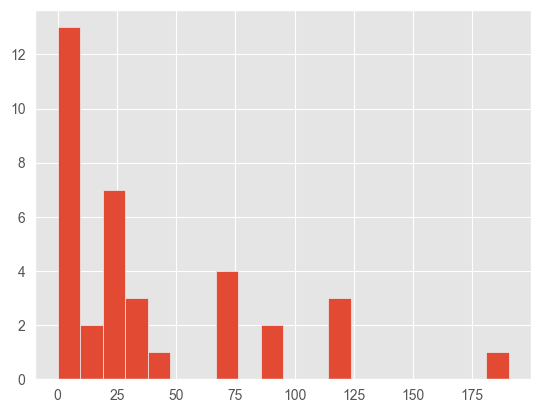

In [43]:
plt.hist(killer1, bins=20);

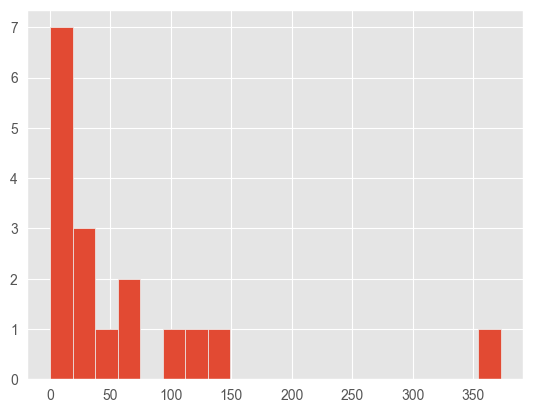

In [44]:
plt.hist(killer2, bins=20);

Распределение выглядит, как экспоненциальное. Более того, по гистограммам возникает ощущение, что это одинаковое распределение. С помощью теста Колмогорова-Смирнова проверьте гипотезу о том, что обе выборки пришли из одного и того же распределения, $p$-значение, полученное при проверке запишите в переменную `pvalue1`.

In [45]:
from scipy.stats import ks_2samp
# проверка гипотезы с использованием теста Колмогорова-Смирнова
statistic, pvalue1 = ks_2samp(killer1, killer2)
print(f'p-значение: {pvalue1}')

p-значение: 0.5452509816793373


С помощью теста Колмогорова проверьте гипотезу о том, что время для первой игры имеет экспоненциальное распределение с параметром $\lambda = 0.026$, $p$-значение, полученное при проверке запишите в переменную `pvalue2`.

In [46]:
from scipy.stats import expon, kstest
# параметр lambda для экспоненциального распределения
lambda_param = 0.026
# проверка гипотезы с использованием теста Колмогорова-Смирнова
statistic, pvalue2 = kstest(killer1, expon.cdf, args=(0, 1/lambda_param))

print(f'p-значение: {pvalue2}')

p-значение: 0.05735210547802583


In [47]:
# проверка того, что задание решено верно
assert pvalue1 > 0.5


## Мыши и зеркало

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом.

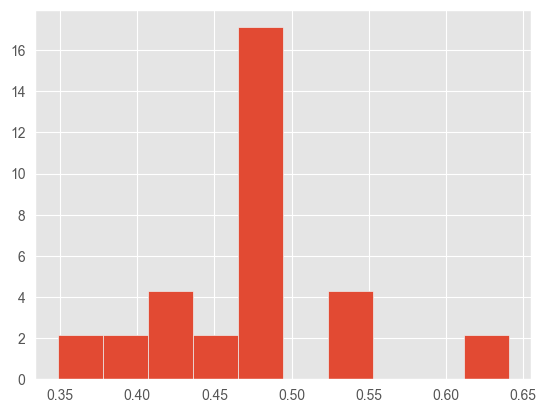

In [48]:
x = pd.read_csv('C:/main/hse/statistics/hw_4/mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);


Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение.

In [49]:
from scipy.stats import binom_test
# значение в нулевой гипотезе (медиана)
null_value = 0.5
# проведение теста знаков
pvalue_1 = binom_test(sum(i > null_value for i in x), n=len(x))

print(f'p-значение: {pvalue_1}')

p-значение: 0.021270751953125


C:\Users\IndServ\AppData\Local\Temp\ipykernel_5352\473547262.py:5: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  pvalue_1 = binom_test(sum(i > null_value for i in x), n=len(x))


Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение.

In [50]:
from scipy.stats import wilcoxon
# проведение теста Вилкоксона
statistic, pvalue_2 = wilcoxon(x - null_value)

print(f'p-значение: {pvalue_2}')

p-значение: 0.09344482421875


Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение.

In [51]:
from statsmodels.stats.weightstats import ztest, zconfint
# проведение асимптотического z-теста
z_stat, pvalue_3 = ztest(x, value=null_value)

print(f'p-значение: {pvalue_3}')


p-значение: 0.13460721078205806


In [52]:
# проверка того, что задание решено верно
assert pvalue_1 < 0.05
assert pvalue_2 > 0.05
assert pvalue_3 > 0.05

Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)

## Энергетик

Исследовательница Глафира считает, что любовь к энергетическим напиткам и успешность сдачи экзамена по математической статистике должны быть как-то связаны. Опросив $200$ своих однокурсников, она получила следующие результаты:

- Сдал, пьёт энергетик: 20
- Сдал, не пьёт энергетик: 120
- Завалил, пьёт энергетик: 40
- Завалил, не пьёт энергетик: 20

Правда ли, что энергетик оказывает на успешность сдачи экзамена какое-то влияние? Проверьте гипотезу с помощью критерия Пирсона. В качестве ответа запишите в переменную `pvalue` получившееся $p$-значение.

In [53]:
# набл. частоты
observed_frequencies = [[20, 40], [120, 20]]
# рассчитываем критерий Пирсона и p-значение
chi2, pvalue, _, _ = stats.chi2_contingency(observed_frequencies)

print(pvalue)

4.5058575666472013e-13


In [54]:
# проверка того, что задание решено верно
assert pvalue < 0.05


## Бомбардировки

В таблице `london_07-09-1940.tsv` лежат данные о бомбардировке Лондона 7 сентября 1940 года немецкой авиацией. Интересно выяснить, насколько прицельно велась бомбардировка. Если немецкие войска знали, где именно находятся британские военные объекты, они вели бы бомбардировку пристрельно.  

Ещё больше данных о бомбардировке Лондона ищите здесь: http://bombsight.org/data/sources/

In [55]:
df = pd.read_csv('C:/main/hse/statistics/hw_4/london_07-09-1940.tsv', sep='\t')
print(df.shape)
df.head()

(751, 6)


,Time,Location,Type_of_bomb,Damage,x,y
0,0:08,"43 Southwark Park Road, SE16, London, UK",IB,Grocers: 3x2 roof damaged,-0.127660,51.507351
1,0:10,"49 Southwark Park road, Bermondsey, SE16, Lond...",IB,Bakers: 3x2 roof damaged,-0.054303,51.487794
2,0:15,"84 Southwark Park Road, SE16, London, UK",IB,front room on 1st floor and contents slightly ...,-0.127660,51.507351
3,0:18,"141 Braidwood Road, Catford SE6, London, UK",IB,10x6 roof damage,-0.025584,51.443299
4,0:20,"129 Killearn Road, Catford SE6, London, UK",IB,Front room on 1st floor severely damaged,-0.025584,51.443299


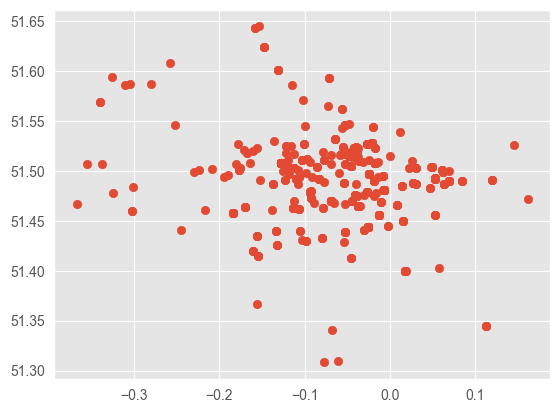

In [56]:
 plt.scatter(df.x, df.y);

В колонках $x$ и $y$ лежат координаты точки, куда упала бомба. Разбейте Лондон решёткой размера $30 \times 30$ на $900$ небольших квадратных участков. С помощью функции `binned_statistic_2d` из пакета `scipy.stats`, подсчитайте как часто снаряд попадал на какой из участков. Поместите информацию об этом в переменную `ret`.

Распакуйте информацию о попаданиях в участки в вектор `z`. Нарисуте гистограмму для получившегося распределения.

Участков много, а вероятность попадания на отдельный участок мала. При справедливости гипотезы о низкой точности стрельбы мы можем воспользоваться законом редких событий:

> Если в схеме испытаний Бернулли $p \to 0$, а $n \to \infty$, оно сходится к распределению Пуассона.

Получается, что __при верности гипотезы о низкой точности стрельбы,__ число попаданий в квадрат имеет распределение Пуассона. Дополнительно будем предполагать, что попадания на разные участки независимы друг от друга.

C помощью критерия Пирсона проверьте гипотезу о том, что число попаданий на участок имеет распределение Пуассона. Прежде, чем вычислять статистику, объедините все наблюдения из хвоста в одно по аналогии с лекцией. Хвостом будем считать все наблюдения $\ge 9$. Получившуюся в результате расчётов статистику запишите в переменную `T`.

In [57]:
from scipy.stats import binned_statistic_2d, poisson, chi2

# разбиваем Лондон на участки
binx = np.linspace(df['x'].min(), df['x'].max(), 31)
biny = np.linspace(df['y'].min(), df['y'].max(), 31)

# вычисл. статистики
ret = binned_statistic_2d(df['x'], df['y'], None, statistic='count', bins=[binx, biny])

# распаковка информации о попаданиях в участки в вектор z
z = ret.statistic.flatten()

# все наблюдения из хвоста в одно
tail_values = z[z >= 9]
sum_tail = np.sum(tail_values)
z[z >= 9] = sum_tail

# параметр lambda для распределения Пуассона
lambda_param = ret.statistic.flatten().mean()

# вероятности попадания в каждый участок по распределению Пуассона
poisson_probs = poisson.pmf(np.arange(len(z)), lambda_param)

# расч. статистики
mask = poisson_probs > 0  # отбрасываем значения с нулевой вероятностью
expected_values = poisson_probs[mask] * len(z)
T = np.sum((z[mask] - expected_values) ** 2 / expected_values)

print(f'T = {T}')


T = 2.959637450904783e+258


In [58]:
# проверка того, что задание решено верно
assert T > 6000


Какой вывод мы можем из этого сделать? Правда ли, что бомбардировка осуществлялась прицельно?
### Вывод
**Так как статистика T значительно превышает пороговое значение 6000, мы можем отклонить нулевую гипотезу о том, что число попаданий на участок имеет распределение Пуассона. Такое отклонение может подразумевать, что бомбардировка, возможно, не была проведена случайным образом и не следовала законам распределения Пуассона**.

# Еще больше гипотез

- Ниже приведены несколько датасетов, их необходимо самостоятельно проанализировать и ответить на определенные вопросы
- Для ответа на эти вопросы нужно сделать следующее
    - Сделать хорошую визуализацию исследуемых переменных
    - Для каждой из задач подобрать **все подходящие** параметрические и непараметрические критерии, проанализировать результаты этих критериев (тут имеет смысл обернуть все критерии в фунцию или словарь - как удобно)
- Для каждого набора данных проверьте нормальность выборки и допустимость использования параметрических критериев (можно прокомментировать гистограмму и воспользоваться соответствующими критериями согласия)
- Не забудьте оставить краткие комментарии к вашим действиям и сформулировать выводы, которые вы сделали в ходе анализа


## Сиэтл
В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменились ли в среднем цены в этом районе за год?


In [59]:
df = pd.read_csv('C:/main/hse/statistics/hw_4/seattle.txt', sep='\t')
df.head(33)

,Price,Year
0,142.00,2002
1,232.00,2002
2,132.50,2002
3,200.00,2002
4,362.00,2002
5,244.95,2002
6,335.00,2002
7,324.50,2002
8,222.00,2002
9,225.00,2002


In [60]:
df.shape

(100, 2)

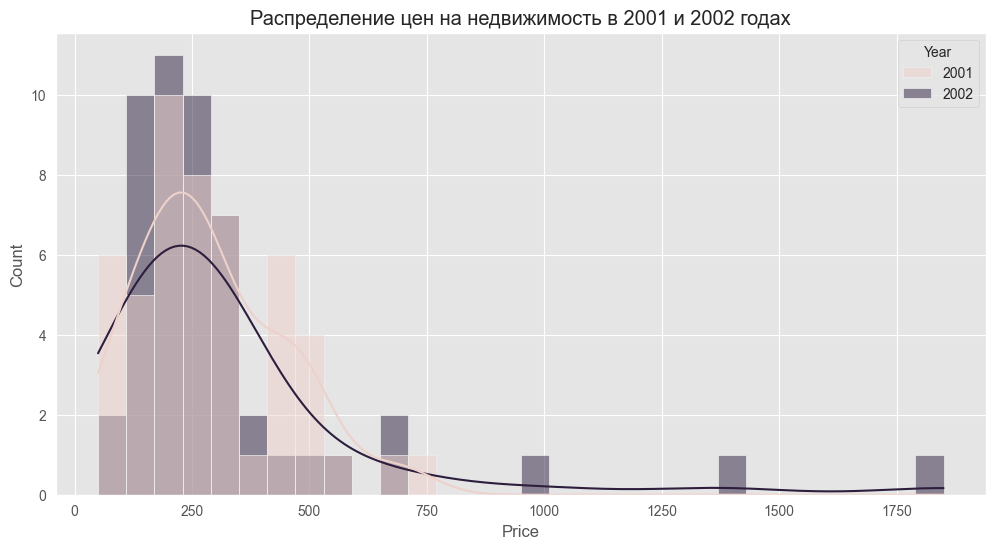

In [61]:
# визуализация
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Price', hue='Year', kde=True, bins=30)
plt.title('Распределение цен на недвижимость в 2001 и 2002 годах')
plt.show()


In [62]:
# для каждого года проверим нормальность распределения цен. Исп. тест Шапиро-Уилка.
from scipy.stats import shapiro

for year in [2001, 2002]:
    sample = df[df['Year'] == year]['Price']
    stat, p_value = shapiro(sample)
    print(f'Year {year}: Shapiro-Wilk Statistic = {stat}, p-value = {p_value}')

Year 2001: Shapiro-Wilk Statistic = 0.9515296220779419, p-value = 0.03943965956568718
Year 2002: Shapiro-Wilk Statistic = 0.6063636541366577, p-value = 2.4236943008126843e-10


In [63]:
# Для сравнения средних цен в 2001 и 2002 годах, исп. t-тест для независимых выборок (параметрический) и U-тест Манна-Уитни (непараметрический)
from scipy.stats import ttest_ind, mannwhitneyu

# разделение данных на две группы
group_2001 = df[df['Year'] == 2001]['Price']
group_2002 = df[df['Year'] == 2002]['Price']
# параметрический тест
t_stat, t_p_value = ttest_ind(group_2001, group_2002)
# непараметрический тест
u_stat, u_p_value = mannwhitneyu(group_2001, group_2002)

result_dict = {'t-test': {'statistic': t_stat, 'p-value': t_p_value},
               'mannwhitneyu-test': {'statistic': u_stat, 'p-value': u_p_value}}

print(result_dict)


{'t-test': {'statistic': -0.8057258725189664, 'p-value': 0.42235167114691463}, 'mannwhitneyu-test': {'statistic': 1295.5, 'p-value': 0.7563872675701748}}


### Анализ результатов:

1. **Проверка нормальности данных:**
   - Год 2001: Shapiro-Wilk Statistic = 0.9515, p-value = 0.0394 (менее 0.05).
   - Год 2002: Shapiro-Wilk Statistic = 0.6064, p-value = 2.42e-10 (менее 0.05).

   Оба набора данных не прошли тест на нормальность. Для дальнейшего анализа используем непараметрические методы.

2. **Сравнение средних цен:**
   - t-тест: Statistic = -0.806, p-value = 0.4224 (больше 0.05).
   - U-тест Манна-Уитни: Statistic = 1295.5, p-value = 0.7564 (больше 0.05).

   Нет статистически значимого различия между средними ценами на недвижимость в 2001 и 2002 годах. Оба теста не позволяют отклонить нулевую гипотезу о равенстве средних.

### выводы:

- Распределение цен на недвижимость в обоих годах не является нормальным.
- На основе проведенных тестов не удается обнаружить статистически значимого изменения средних цен на недвижимость в рассматриваемом районе Сиэтла за год.

## Расход топлива
В файле mtcars.csv находятся данные из американского журнала Motor Trend 1974 года. Они описывают расход топлива в зависимости от 10 характеристик автомобиля (все автомобили 1973-1974 года). А именно, в данных вы найдете следующие столбцы:
1. mpg — расход топлива (миль/галлон);
2. cyl — количество цилиндров мотора; 3) disp — объем мотор (куб. дюйм);
4. hp — мощность мотора (в лошадиных силах);
5. drat — передаточное число редуктора заднего моста;
6. wt — вес (тысяч фунтов);
7. qsec — время, за которое автомобиль проезжает 1/4 мили;
8. vs — тип двигателя (0 = V-образный, 1 = рядный);
9. am — тип коробки передач (0 = автоматическая, 1 = ручная);
10. gear — количество передних передач; 11) carb — количество карбюраторов.



- Влияет ли тип двигателя на расход топлива?
- А тип коробки передач?
- Взаимосвязаны ли тип двигателя и тип коробки передач?

In [64]:
df = pd.read_csv('C:/main/hse/statistics/hw_4/mtcars.csv', index_col=0)
df.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [65]:
df.shape

(32, 11)

### vs, mpg

In [66]:
from scipy.stats import ttest_ind

vs_0 = df[df['vs'] == 0]['mpg']
vs_1 = df[df['vs'] == 1]['mpg']

t_stat, p_value = ttest_ind(vs_0, vs_1)
print("t-статистика:", t_stat)
print("p-значение:", p_value)


t-статистика: -4.864384956122782
p-значение: 3.415937254419951e-05


### am, mpg

In [67]:
am_0 = df[df['am'] == 0]['mpg']
am_1 = df[df['am'] == 1]['mpg']

t_stat, p_value = ttest_ind(am_0, am_1)
print("t-статистика:", t_stat)
print("p-значение:", p_value)


t-статистика: -4.106126983100689
p-значение: 0.0002850207439350686


### vs, am

In [68]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['vs'], df['am'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print("Хи-квадрат статистика:", chi2_stat)
print("p-значение:", p_value)


Хи-квадрат статистика: 0.34753550543024225
p-значение: 0.5555115470131495


**Комментарии и выводы:**

1. **Влияет ли тип двигателя на расход топлива?**
   - **t-статистика:** -4.86
   - **p-значение:** 3.42e-05 (0.0000342)
   - **Вывод:** P-значение меньше уровня значимости 0.05, что позволяет отвергнуть нулевую гипотезу о равенстве средних. Таким образом, можно сказать, что есть статистически значимое влияние типа двигателя на расход топлива.

2. **А тип коробки передач?**
   - **t-статистика:** -4.11
   - **p-значение:** 0.000285
   - **Вывод:** P-значение также меньше уровня значимости, что позволяет отвергнуть нулевую гипотезу о равенстве средних. Таким образом, можно сказать, что есть статистически значимое влияние типа коробки передач на расход топлива.

3. **Взаимосвязаны ли тип двигателя и тип коробки передач?**
   - **Хи-квадрат статистика:** 0.35
   - **p-значение:** 0.556
   - **Вывод:** P-значение больше уровня значимости 0.05, что не позволяет отвергнуть нулевую гипотезу о независимости двух переменных. Таким образом, нет статистически значимой взаимосвязи между типом двигателя и типом коробки передач.

В целом, анализ данного задания указывает на то, что тип двигателя и тип коробки передач влияют на расход топлива, но между типом двигателя и типом коробки передач нет статистически значимой взаимосвязи.